# In this project we will be building a machine learning model using the ChEMBL bioactivity data.
# We will be performing Data Collection and Pre-Processing from the ChEMBL Database.


## **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.


## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [53]:
! pip install chembl_webresource_client


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Importing libraries**

In [70]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for coronavirus**

In [74]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### **Select and retrieve bioactivity data for *SARS coronavirus 3C-like proteinase* (fifth entry)**

We will assign the fifth entry (which corresponds to the target protein, *coronavirus 3C-like proteinase*) to the ***selected_target*** variable 

In [78]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL613837'

Here, we will retrieve only bioactivity data for *coronavirus 3C-like proteinase* (CHEMBL3927) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [81]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [83]:
df = pd.DataFrame.from_dict(res)

In [84]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,22804102,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4712028,Antiviral activity against HCoV-229E infected ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,1.7
1,None,None,24984054,"[{'comments': None, 'relation': '<=', 'result_...",CHEMBL5227023,Antiviral activity against recombinant HCoV-22...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,0.7
2,None,None,24992649,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,3.35


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [88]:
df.to_csv('bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [91]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,22804102,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4712028,Antiviral activity against HCoV-229E infected ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,1.7
1,None,None,24984054,"[{'comments': None, 'relation': '<=', 'result_...",CHEMBL5227023,Antiviral activity against recombinant HCoV-22...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,0.7
2,None,None,24992649,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,3.35
3,None,None,24992650,[],CHEMBL5230448,Antiviral activity against HCoV-229E,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,nM,UO_0000065,None,1.48
4,None,None,24992680,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5230463,Antiviral activity against HCoV-229E assessed ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,5.1
5,None,None,25080001,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5255429,Antiviral activity against HCoV-229E harboring...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,18.1
6,None,None,25457414,[],CHEMBL5320542,Antiviral activity against HCoV-229E infected ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,0.14
7,None,None,25457415,[],CHEMBL5320542,Antiviral activity against HCoV-229E infected ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,0.14
8,None,None,25516075,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336144,Antiviral activity against hCoV-229E infected ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,1.34
9,None,None,25516076,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5336144,Antiviral activity against hCoV-229E infected ...,F,None,None,BAO_0000190,...,Human coronavirus 229E,Human coronavirus 229E,11137,None,None,IC50,uM,UO_0000065,None,0.04


Apparently, for this dataset there is no missing data. But we can use the above code cell for bioactivity data of other target protein.

## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [96]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  #else:
  #  bioactivity_class.append("intermediate")

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [99]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,1700.0
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,700.0
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,3350.0
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,1.48
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,5100.0
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,18100.0
6,CHEMBL1230135,Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](...,140.0
7,CHEMBL213054,CC(OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@...,140.0
8,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,1340.0
9,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,40.0


In [101]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,1700.0,active
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,700.0,active
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,3350.0,inactive
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,1.48,active
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,5100.0,active
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,18100.0,active
6,CHEMBL1230135,Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](...,140.0,active
7,CHEMBL213054,CC(OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@...,140.0,active
8,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,1340.0,NaN
9,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,40.0,NaN


In [103]:
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)

In [105]:
! ls -l

total 280
-rw-r--r-- 1 Parikshit 197121 209244 Mar  8 14:29 Drug Discovey with GENAI.ipynb
-rw-r--r-- 1 Parikshit 197121   2083 Mar  8 14:32 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 Parikshit 197121   9223 Mar  8 14:32 bioactivity_data_raw.csv
-rw-r--r-- 1 Parikshit 197121  19542 Mar  8 11:27 plot_MW_vs_LogP.pdf
-rw-r--r-- 1 Parikshit 197121  16285 Mar  8 11:27 plot_bioactivity_class.pdf
-rw-r--r-- 1 Parikshit 197121  16496 Mar  8 11:28 plot_ic50.pdf


## Exploratiory Data Ananalasysis

## **Install conda and rdkit**

In [109]:
conda list rdkit



Note: you may need to restart the kernel to use updated packages.


In [111]:
conda activate my_rdkit_env



Note: you may need to restart the kernel to use updated packages.


In [112]:
import rdkit
from rdkit import Chem
print(rdkit.__version__)


2024.09.6


In [113]:
conda install -n my_rdkit_env ipykernel -c conda-forge


Note: you may need to restart the kernel to use updated packages.


## As I have have already added rdkit in my environment so i do not need to install them

## **Load bioactivity data**

In [119]:
import pandas as pd



In [121]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [125]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [128]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [130]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [133]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,796.992,1.00060,10.0,14.0
1,507.428,4.30040,2.0,3.0
2,4331.996,-9.97540,59.0,60.0
3,574.747,3.65990,2.0,5.0
4,542.036,3.93950,1.0,10.0
5,430.585,5.79740,1.0,4.0
6,680.803,2.08362,5.0,9.0
7,600.757,3.15010,4.0,7.0
8,328.466,3.34562,1.0,5.0
9,485.559,0.54470,5.0,7.0


In [135]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,1700.00,active
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,700.00,active
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,3350.00,inactive
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,1.48,active
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,5100.00,active
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,18100.00,active
6,CHEMBL1230135,Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](...,140.00,active
7,CHEMBL213054,CC(OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@...,140.00,active
8,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,1340.00,NaN
9,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,40.00,NaN


In [137]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [139]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,1700.00,active,796.992,1.00060,10.0,14.0
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,700.00,active,507.428,4.30040,2.0,3.0
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,3350.00,inactive,4331.996,-9.97540,59.0,60.0
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,1.48,active,574.747,3.65990,2.0,5.0
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,5100.00,active,542.036,3.93950,1.0,10.0
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,18100.00,active,430.585,5.79740,1.0,4.0
6,CHEMBL1230135,Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](...,140.00,active,680.803,2.08362,5.0,9.0
7,CHEMBL213054,CC(OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@...,140.00,active,600.757,3.15010,4.0,7.0
8,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,1340.00,NaN,328.466,3.34562,1.0,5.0
9,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,40.00,NaN,485.559,0.54470,5.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [142]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

In [144]:
df_combined.standard_value.describe()

count       12.000000
mean      2554.040000
std       5150.306287
min          1.480000
25%         36.000000
50%        420.000000
75%       2112.500000
max      18100.000000
Name: standard_value, dtype: float64

In [146]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [148]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [150]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [153]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,active,796.992,1.00060,10.0,14.0,1700.00
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,active,507.428,4.30040,2.0,3.0,700.00
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,inactive,4331.996,-9.97540,59.0,60.0,3350.00
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,active,574.747,3.65990,2.0,5.0,1.48
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,active,542.036,3.93950,1.0,10.0,5100.00
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,active,430.585,5.79740,1.0,4.0,18100.00
6,CHEMBL1230135,Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](...,active,680.803,2.08362,5.0,9.0,140.00
7,CHEMBL213054,CC(OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@...,active,600.757,3.15010,4.0,7.0,140.00
8,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,NaN,328.466,3.34562,1.0,5.0,1340.00
9,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,NaN,485.559,0.54470,5.0,7.0,40.00


In [155]:
df_norm.standard_value_norm.describe()

count       12.000000
mean      2554.040000
std       5150.306287
min          1.480000
25%         36.000000
50%        420.000000
75%       2112.500000
max      18100.000000
Name: standard_value_norm, dtype: float64

In [157]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,active,796.992,1.00060,10.0,14.0,5.769551
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,active,507.428,4.30040,2.0,3.0,6.154902
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,inactive,4331.996,-9.97540,59.0,60.0,5.474955
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,active,574.747,3.65990,2.0,5.0,8.829738
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,active,542.036,3.93950,1.0,10.0,5.292430
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,active,430.585,5.79740,1.0,4.0,4.742321
6,CHEMBL1230135,Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](...,active,680.803,2.08362,5.0,9.0,6.853872
7,CHEMBL213054,CC(OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@...,active,600.757,3.15010,4.0,7.0,6.853872
8,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,NaN,328.466,3.34562,1.0,5.0,5.872895
9,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,NaN,485.559,0.54470,5.0,7.0,7.397940


In [159]:
df_final.pIC50.describe()

count    12.000000
mean      6.562360
std       1.215698
min       4.742321
25%       5.695902
50%       6.504387
75%       7.453402
max       8.829738
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [162]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4763715,C[C@H]1O[C@@](O)(O[C@H]2CC[C@@]3(C)[C@@H](CC[C...,active,796.992,1.00060,10.0,14.0,5.769551
1,CHEMBL5270175,O=C(NC(Cc1ccccc1)C(=O)N1CCC(O)(c2ccc(Br)cc2)CC...,active,507.428,4.30040,2.0,3.0,6.154902
2,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,inactive,4331.996,-9.97540,59.0,60.0,5.474955
3,CHEMBL91704,CN1CCN(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](/C=C...,active,574.747,3.65990,2.0,5.0,8.829738
4,CHEMBL217092,CN1CCN(CCOc2cc(OC3CCOCC3)c3c(Nc4c(Cl)ccc5c4OCO...,active,542.036,3.93950,1.0,10.0,5.292430
5,CHEMBL5278230,C=C(C=O)[C@H]1CC=C2[C@H](OC(=O)/C(C)=C/CCCCCCC...,active,430.585,5.79740,1.0,4.0,4.742321
6,CHEMBL1230135,Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](...,active,680.803,2.08362,5.0,9.0,6.853872
7,CHEMBL213054,CC(OC(C)(C)C)[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@...,active,600.757,3.15010,4.0,7.0,6.853872
8,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,NaN,328.466,3.34562,1.0,5.0,5.872895
9,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,NaN,485.559,0.54470,5.0,7.0,7.397940


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [166]:
conda install -c anaconda seaborn -y



Note: you may need to restart the kernel to use updated packages.


In [168]:
!pip install seaborn


In [169]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

C:\Users\Parikshit\AppData\Local\Temp\ipykernel_16640\3900520082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=colors)


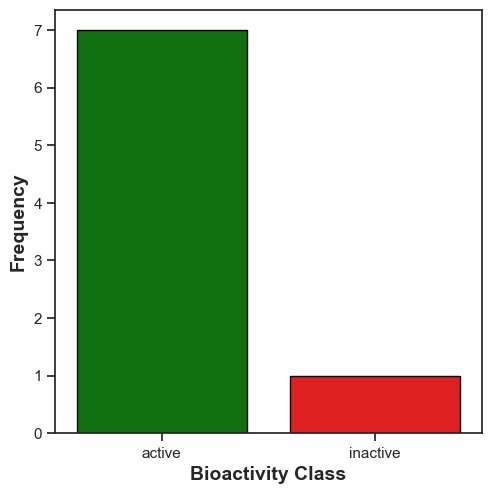

In [175]:

plt.figure(figsize=(5.5, 5.5))

# Define color mapping
colors = {"active": "green", "inactive": "red"}

# Create count plot
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black', palette=colors)

# Labels and styling
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Save plot as PDF
plt.savefig('plot_bioactivity_class.pdf')

# Show the plot
plt.show()


### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

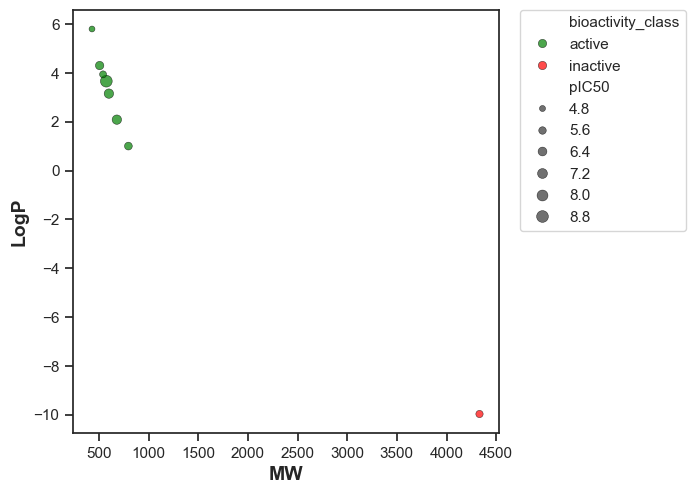

In [178]:

# Set figure size
plt.figure(figsize=(5.5, 5.5))

# Define color mapping for bioactivity classes
colors = {"active": "green", "inactive": "red"}

# Create scatter plot
sns.scatterplot(
    x='MW', 
    y='LogP', 
    data=df_2class, 
    hue='bioactivity_class', 
    palette=colors,  # Apply color mapping
    size='pIC50', 
    edgecolor='black', 
    alpha=0.7
)

# Labels and legend positioning
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Save the figure as a PDF
plt.savefig('plot_MW_vs_LogP.pdf')

# Show the plot
plt.show()


### **Box plots**

#### **pIC50 value**

C:\Users\Parikshit\AppData\Local\Temp\ipykernel_16640\2762336184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class, palette=colors)


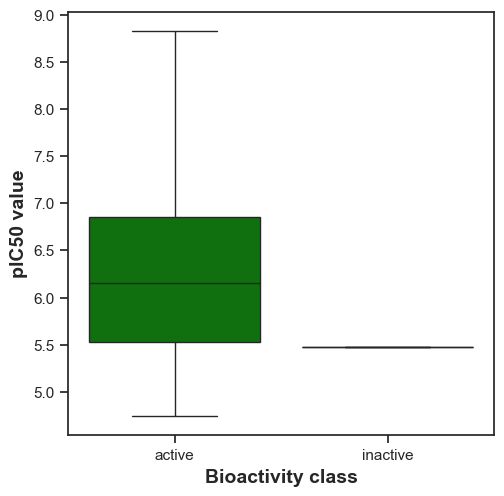

In [182]:

plt.figure(figsize=(5.5, 5.5))

# Define color mapping
colors = {"active": "green", "inactive": "red"}

# Create boxplot with custom colors
sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

# Save figure
plt.savefig('plot_ic50.pdf')

# Show plot
plt.show()


**Statistical analysis | Mann-Whitney U Test**

In [185]:
conda activate my_rdkit_env



Note: you may need to restart the kernel to use updated packages.


In [186]:
import scipy
print(scipy.__version__)


1.15.2


In [189]:
conda install -c anaconda scipy



Note: you may need to restart the kernel to use updated packages.


In [191]:
!pip install scipy


In [192]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [197]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5.0,0.66062,0.05,Same distribution (fail to reject H0)


#### **MW**

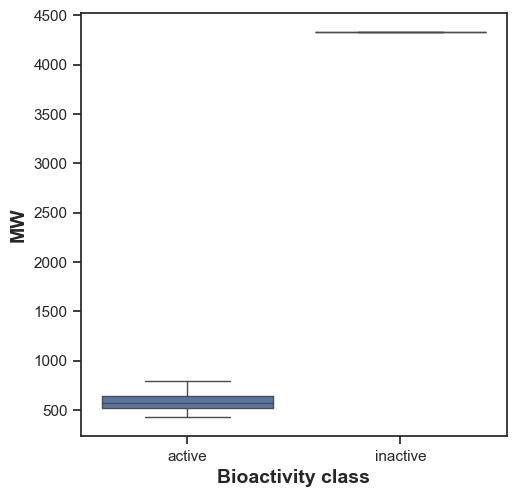

In [200]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [202]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.0,0.25,0.05,Same distribution (fail to reject H0)


#### **LogP**

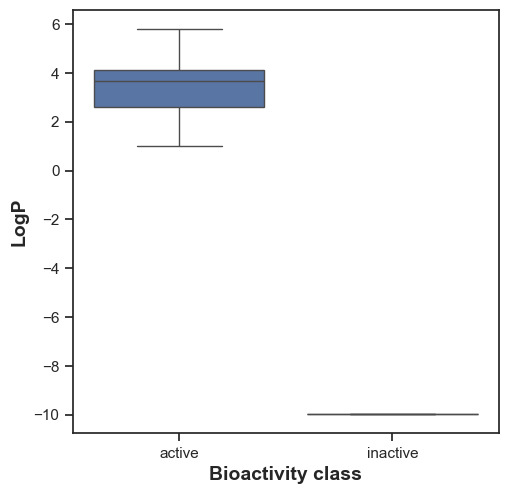

In [205]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [207]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7.0,0.25,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

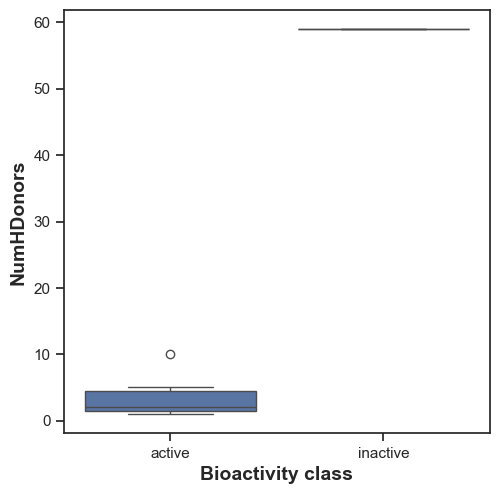

In [210]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [213]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.185112,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

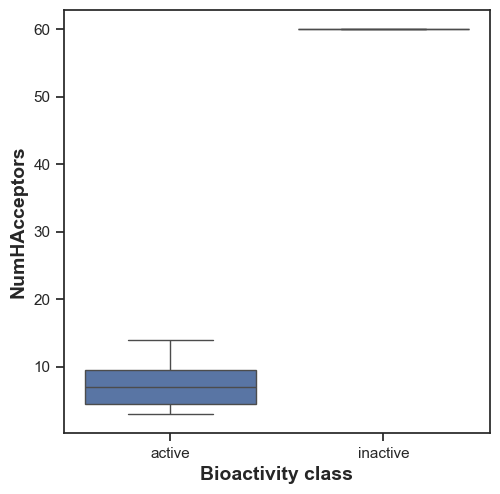

In [216]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [218]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.0,0.25,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
import shutil

shutil.make_archive("results", "zip", ".", base_dir=".", logger=None)
